# Проект: Принятие решений в бизнесе

## Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

### Описание данных

**Данные для первой части:**

Файл /datasets/hypothesis.csv

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части:**

Файл /datasets/orders.csv

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. 

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Цель исследования

- Приоритизировать гипотезы
- Запуститить A/B-тест


### План работы

Часть 1. Приоритизация гипотез.
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Задача
•	Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
•	Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
•	Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Часть 2. Анализ A/B-теста
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
Задача
Проанализируйте A/B-тест:
1.	Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2.	Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3.	Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4.	Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
5.	Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
6.	Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7.	Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8.	Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9.	Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10.	Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
11.	Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12.	Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
13.	Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14.	Примите решение по результатам теста и объясните его. Варианты решений: 
 1. Остановить тест, зафиксировать победу одной из групп.
 2. Остановить тест, зафиксировать отсутствие различий между группами.
 3. Продолжить тест.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats
import datetime as dt
import numpy as np
import math
%matplotlib inline

In [2]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    hypothesis = pd.read_csv('hypothesis.csv')
    orders  =  pd.read_csv('orders.csv')
    visitors  =  pd.read_csv('visitors.csv')    

In [3]:
def first_look(df):
    print('---------------------------Первые 5 строк----------------------------')
    display(df.head())
    print(' ')
    print(' ')
    print('--------------Общая информация--------------')
    print(' ')
    print(df.info())
    print(' ')
    print('-------------Пропуски------------- ')
    print(' ')
    count=0
    for element in df.columns:
        if df[element].isna().sum() > 0:
            print(element, ' - ', df[element].isna().sum(), 'пропусков')
            count = +1
    if count == 0:
        print(' ')
        print('Пропусков НЕТ')
    print(' ')
    print('-------------Дубликаты------------ ')
    print(' ')
    if df.duplicated().sum() > 0:
        print(' ')
        print('Дубликатов: ', df.duplicated().sum())
    else:
                print('Дубликатов НЕТ')
    print(' ')  
    

In [4]:
pd.set_option('display.max_colwidth',500) #используем для полного просмотра названий гипотез
first_look(hypothesis)

---------------------------Первые 5 строк----------------------------


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


 
 
--------------Общая информация--------------
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
 
-------------Пропуски------------- 
 
 
Пропусков НЕТ
 
-------------Дубликаты------------ 
 
Дубликатов НЕТ
 


In [5]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В таблице **hypothesis** - 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

## Приоритизация гипотез

### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

**ICE = Impact x Confidence / Efforts**
- **Impact** — влияние
- **Confidence** — уверенность 
- **Effort** — трудозатраты

In [6]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
ice = hypothesis[['Hypothesis','ICE']].sort_values(by='ICE',ascending=False).round(2)
ice

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

**RICE = (Reach x Impact x Confidence) / Efforts**
- **Reach** - охват
- **Impact** — влияние
- **Confidence** — уверенность 
- **Effort** — трудозатраты

In [7]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
rice = hypothesis[['Hypothesis','RICE']].sort_values(by='RICE',ascending=False)
rice

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [8]:
ice_rice = ice.merge(rice, on='Hypothesis')
ice_rice

,Hypothesis,ICE,RICE
0,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.2
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40.0
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,112.0
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,40.0
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,56.0
5,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,4.0
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4.0
7,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9.0
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,3.0


<AxesSubplot:ylabel='Hypothesis'>

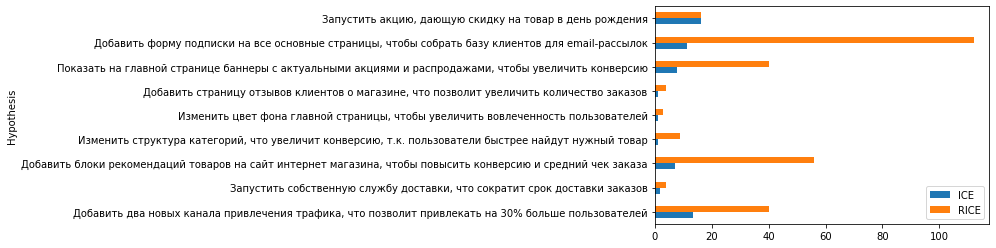

In [9]:
hypothesis.set_index('Hypothesis')[['ICE','RICE']].plot(kind='barh')

### Рассмотрим, как изменилась приоритизация гипотез при применении RICE вместо ICE.

При использовании модифицированного метода **RICE**, мы добавили компонент "Reach" (скольких пользователей затронет изменение, которое мы хотим внести), соответственно охват увеличил значимость влияния и уверенности, по отношению к затратам.

Приоритеты флейморка **ICE**:

- Запустить акцию, дающую скидку на товар в день рождения - Гипотеза №8
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей - Гипотеза №0
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок - Гипотеза №7 

Приоритеты флейморка **RICE**:

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок - Гипотеза №7
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа - Гипотеза №2
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей - Гипотеза №0

Гипотезы под номерами "0" и "7" имеют приоритет в обоих методах.

## Анализ A/B-теста

### Проверим данные в orders и visitors

In [10]:
first_look(orders)

---------------------------Первые 5 строк----------------------------


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


 
 
--------------Общая информация--------------
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
 
-------------Пропуски------------- 
 
 
Пропусков НЕТ
 
-------------Дубликаты------------ 
 
Дубликатов НЕТ
 


In [11]:
first_look(visitors)

---------------------------Первые 5 строк----------------------------


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


 
 
--------------Общая информация--------------
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
 
-------------Пропуски------------- 
 
 
Пропусков НЕТ
 
-------------Дубликаты------------ 
 
Дубликатов НЕТ
 


In [12]:
orders['date'] = pd.to_datetime(orders['date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [13]:
visitors['date'] = pd.to_datetime(visitors['date'])
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [14]:
sum_visitors_a = visitors[visitors['group']=='A']['visitors'].sum()
sum_visitors_b = visitors[visitors['group']=='B']['visitors'].sum()
print('Пользователей в группе А:', sum_visitors_a, 'Пользователей в группе В:',sum_visitors_b)

Пользователей в группе А: 18736 Пользователей в группе В: 18916


In [15]:
unique_users = orders.groupby('visitorId').agg({'group':'nunique'})
unique_users.count()

group    1031
dtype: int64

In [16]:
users_ab = unique_users.query('group >1')
users_ab.count()

group    58
dtype: int64

In [17]:
user_a = orders.query('group == "A"').count()
user_a

transactionId    557
visitorId        557
date             557
revenue          557
group            557
dtype: int64

In [18]:
user_b = orders.query('group == "B"').count()
user_b

transactionId    640
visitorId        640
date             640
revenue          640
group            640
dtype: int64

Размер группы "А" сильно отличается от группы "В", что является недоработкой подготовки к тесту. Выявили 58 пользователей участвующих и в группе "А" и в группе "В", такого быть не должно, иначе придётся использовать уже совсем другие тесты, а они работают хуже, чем тесты для независимых выборок. Избавимся от них.

In [19]:
users_ab = (np.intersect1d(orders.query('group == "A"')['visitorId']
                           .unique(),orders.query('group == "B"')['visitorId'].unique())) 

orders = orders[~orders['visitorId'].isin(users_ab)]

### Построим график кумулятивной выручки по группам. 

**Подготовим данные**

In [20]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [21]:
# соберём агрегированные кумулятивные по дням данные о заказах
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                    .agg({'date' : 'max', 
                          'group' : 'max', 
                          'transactionId' : 'nunique', 
                          'visitorId' : 'nunique', 
                          'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group']))


In [22]:
# получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                      .agg({'date' : 'max',
                            'group' : 'max',
                            'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])) 

In [23]:
# объединим обе таблицы в одну с понятными названиями столбцов
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 


        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


**Построим графики кумулятивной выручки по дням и группам A/B-тестирования:**

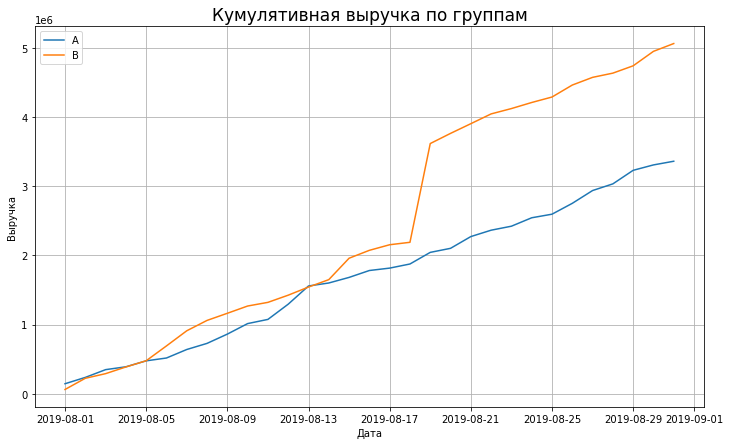

In [24]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12,7))
plt.title('Кумулятивная выручка по группам', fontsize=17)
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid()
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()


Выручка почти одинаково увеличивалась до середины августа. Во второй половине августа в группе "В" наблюдаются две точки резкого роста. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов.

### Построим график кумулятивного среднего чека по группам

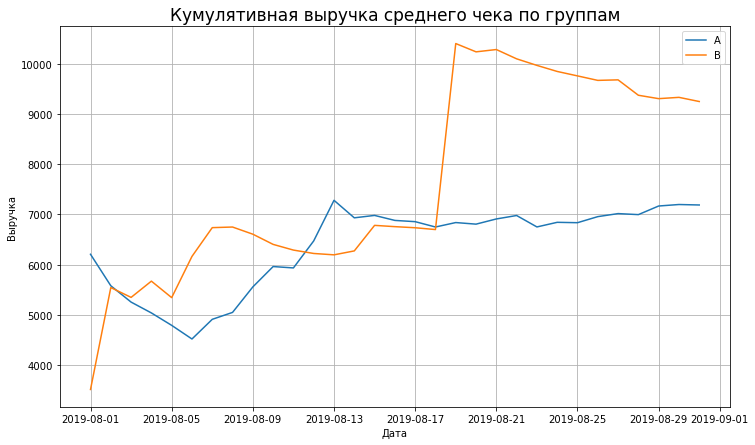

In [25]:
plt.figure(figsize=(12,7))
plt.title('Кумулятивная выручка среднего чека по группам', fontsize=17)
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid()
# построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.legend()

Кумулятивная выручка среднего чека стабилизируется в середине августа после роста у группы "А" и резко увеличивается у группы "В". Во второй половине августа у группы "А" небольшой стабильный рост, у группы "В" спад к концу месяца. Возможно, в группу "B" после 16 августа попали крупные заказы (резкий всплеск на графике)

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

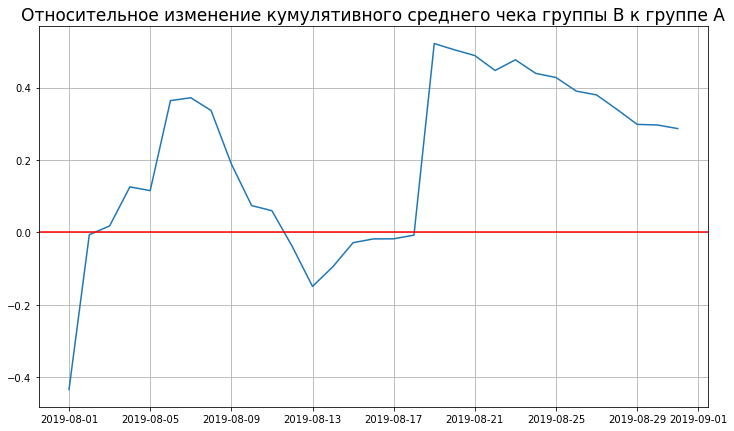

In [26]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB,
                                                   left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(12,7))
plt.grid()
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A', fontsize=17)
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/
                                           mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/
                                                                                mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='red', linestyle='-') 

В нескольких точках графика есть резкие скачки, что также говорит о крупных заказах и выбросах.

### Построим график кумулятивной конверсии по группам

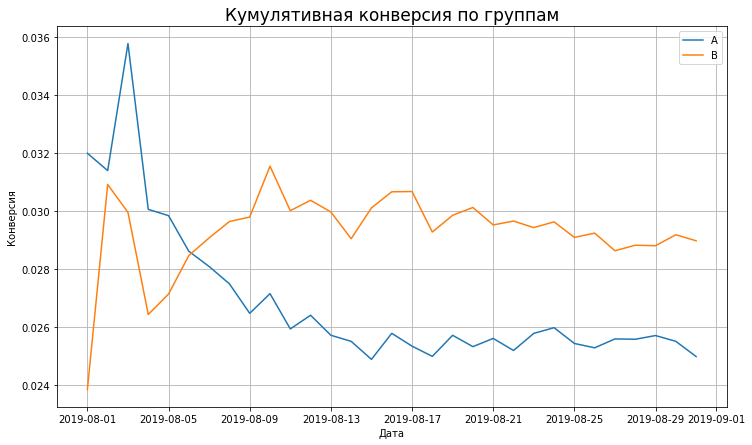

In [27]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12,7))
plt.title('Кумулятивная конверсия по группам', fontsize=17)
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
#plt.axis(["2019-08-01", "2019-08-31", 0.0238, 0.036]) 


Кумулятивная конверсия на графиках имеет небольшие скачки в начале месяца. После 10 августа стабилизируется в группе "А" ~ 2.6%, в группе "В" ~ 3%, что говорит о стабильной конверсии пользователей в покупателей. 

### Построим график относительного изменения кумулятивной конверсии группы B к группе A

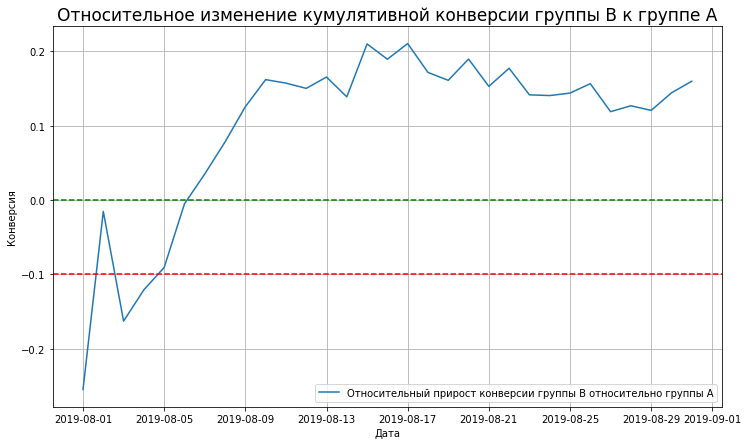

In [28]:
mergedCumulativeConversions = (cumulativeDataA[['date','conversion']]
                               .merge(cumulativeDataB[['date','conversion']],
                                      left_on='date', right_on='date', how='left', suffixes=['A', 'B']))

plt.figure(figsize=(12,7))
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A', fontsize=17)
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.grid()
plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='green', linestyle='--')
plt.axhline(y=-0.1, color='red', linestyle='--')
#plt.axis(["2019-08-01", '2019-08-31', -0.3, 0.3]) 

В начале месяца мы видим колебания конверсии группы "В" относительно группы "А", но ~ с 6 августа конверсия группы "В" растёт до ~ 20%, снижаясь к концу месяца до 16%. Проанализируем аномалии.

### Построим точечный график количества заказов по пользователям

Text(0, 0.5, 'Кол-во пользователей')

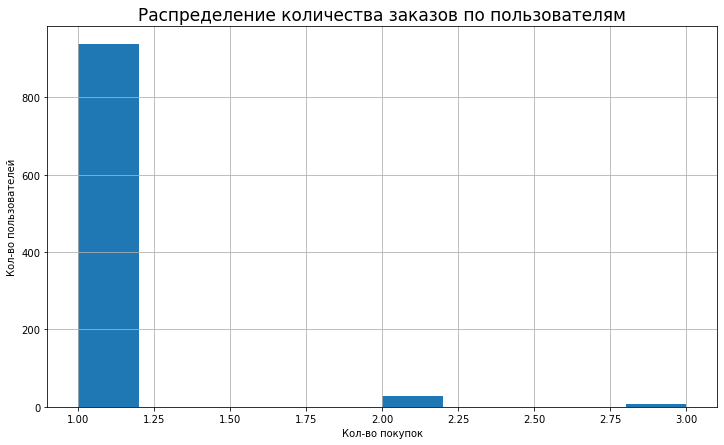

In [29]:
ordersByUsers  = (orders.drop(['group', 'revenue', 'date'], 
                             axis=1).groupby('visitorId', as_index=False)
                  .agg({'transactionId': 'nunique'}))
ordersByUsers.columns = ['userId', 'orders']
plt.figure(figsize=(12,7))
plt.hist(ordersByUsers['orders'])
plt.grid()
plt.title('Распределение количества заказов по пользователям', fontsize=17)
plt.xlabel('Кол-во покупок')
plt.ylabel('Кол-во пользователей')

In [30]:
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

         userId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


In [31]:
ordersByUsers.describe()

,userId,orders
count,9.730000e+02,973.000000
mean,2.118387e+09,1.044193
std,1.221446e+09,0.238090
min,5.114589e+06,1.000000
25%,1.028756e+09,1.000000
50%,2.138109e+09,1.000000
75%,3.141508e+09,1.000000
max,4.283872e+09,3.000000


Text(0.5, 0, 'Кол-во пользователей')

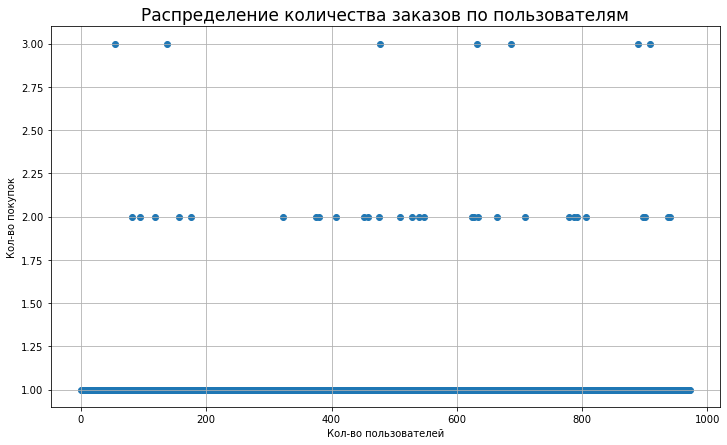

In [32]:
plt.figure(figsize=(12,7))
plt.grid()
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Распределение количества заказов по пользователям', fontsize=17)
plt.ylabel('Кол-во покупок')
plt.xlabel('Кол-во пользователей')

Подавляющее большинство совершило 1 покупку, но также есть и с 2мя. Несколько аномалий в 3 покупки.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.
- **Выберем границу для определения аномальных пользователей**

In [33]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


Установим границу аномальных заказов в 1 покупку. 

### Построим точечный график стоимости заказов

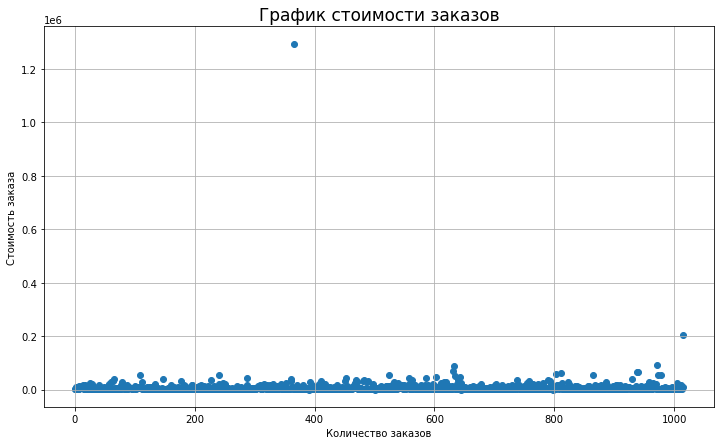

In [34]:
plt.figure(figsize=(12,7))
plt.xlabel('Количество заказов')
plt.ylabel('Стоимость заказа')
plt.title('График стоимости заказов', fontsize=17)
x_values = pd.Series(range(0,len(orders)))
plt.scatter(x_values, orders['revenue'])
plt.grid()

По точечному графику видно явный выброс более 1.2 млн и 0.2 млн.

### Посчитаем 95-й и 99-й перцентили стоимости заказов
- **Выберем границу для определения аномальных заказов**

In [35]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Не более 5% совершили покупку больше чем на 26785 и не более 1% больше чем на 53904. Установим 26785 границей для аномальной суммы заказа.

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным

- **H₀ - статистически значимых различий в конверсии между группами нет** 
- **H₁ - статистически значимые различия в конверсии между группами есть**

In [36]:
# подготовим данные
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)

ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

Описание таблицы **data**:
- date — дата;
- ordersPerDateA — количество заказов в выбранную дату в группе A;
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;
- ordersPerDateB — количество заказов в выбранную дату в группе B;
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
- visitorsPerDateA — количество пользователей в выбранную дату в группе A;
- visitorsPerDateB — количество пользователей в выбранную дату в группе B;
- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

In [37]:
display(data.head(5)) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов

In [38]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [39]:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
 
sampleA = (pd.concat([ordersByUsersA['orders'],
                      pd.Series(0, index=np.arange(data['visitorsPerDateA']
                                                   .sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0))

sampleB = (pd.concat([ordersByUsersB['orders'],
                      pd.Series(0, index=np.arange(data['visitorsPerDateB']
                                                   .sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0))

**Посчитаем статистическую значимость различия в конверсии между группами**

In [40]:
print("p-value: {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост группы B к группе A: {0:.2%}".format(sampleB.mean()/sampleA.mean()-1))

p-value: 0.01102
Относительный прирост группы B к группе A: 15.98%


p-value < 0.05 - отвергаем нулевую гипотезу. Относительный прирост конверсии группы B = 15.98%

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

- **H₀ - статистически значимых различий в среднем чеке заказа между группами нет** 
- **H₁ - статистически значимые различия в среднем чеке заказа между группами есть**

In [41]:
print("p-value: {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))

print("Относительный прирост группы B к группе A: {0:.2%}".format(orders[orders['group']=='B']['revenue']
                       .mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.829
Относительный прирост группы B к группе A: 28.66%


p-value > 0.05 - не отвергаем нулевую гипотезу. Относительный прирост различий в среднем чеке группы B = 28.66%

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным

- **H₀ - статистически значимых различий в конверсии между группами по «очищенным» данным нет** 
- **H₁ - статистически значимые различия в конверсии между группами по «очищенным» данным есть**

- 95-й и 99-й перцентили средних чеков равны 26785 и 53904
- 95-й и 99-й перцентили количества заказов на одного пользователя равны 1 и 2

In [42]:
# примем за аномальных пользователей тех, кто совершил больше 1 заказа или совершил заказ дороже 28 000 рублей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitorId']

# Объединим аномальных пользователей
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print('Аномальных пользователей:', abnormalUsers.shape[0]) 

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64
Аномальных пользователей: 86


In [43]:
# подготовим выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# применим статистический критерий Манна-Уитни к полученным выборкам

print("p-value: {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный прирост группы B к группе A: {0:.2%}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.016
Относительный прирост группы B к группе A: 17.39%


p-value < 0.05 - отвергаем нулевую гипотезу. Относительный прирост конверсии группы B = 17.39%

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

- **H₀ - статистически значимых различий в среднем чеке заказа между группами по «очищенным» данным нет** 
- **H₁ - статистически значимые различия в среднем чеке заказа между группами по «очищенным» данным есть**

In [44]:
print("p-value: {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("Относительный прирост группы B к группе A: {0:.2%}".format(
    orders[np.logical_and(
        orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))



p-value: 0.727
Относительный прирост группы B к группе A: -3.37%


p-value > 0.05 - не отвергаем нулевую гипотезу. Относительная убыль различий в среднем чеке заказа по «очищенным» данным группы B = 3.37%

- **Присутствуют статистически значимые различия по конверсии между группами, как по «сырым», так и по "очищенным" данным**
- **Отсутствуют статистически значимые различия по среднему чеку между группами, как по «сырым», так и по "очищенным" данным**

## Вывод:

**После применения фреймворков ICE и RICE для приоритизации гипотез, рекомендуется:**

- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей - Гипотеза №0
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок - Гипотеза №7 



**На основании полученных данных, тест можно остановить, и признать победителем группу "В".** Различий в среднем чеке нет, но статистически значимые различия конверсии, как по "сырым", так и по "очищенным" данным в пользу группы "В". 

- Относительный прирост конверсии группы B = 15.98%
- Относительный прирост различий в среднем чеке группы B = 28.66%
- Относительный прирост конверсии по "очищенным" данным группы B = 17.39%

Единственный показатель, где группа "В" проиграла - Относительная убыль различий в среднем чеке заказа по «очищенным» данным = 3.37%

Графики 'Относительного изменения кумулятивной конверсии группы B к группе A', 'Относительного изменения кумулятивного среднего чека группы B к группе A', 'Кумулятивной выручки по группам', 'Кумулятивной выручки среднего чека по группам' также показывают лидерство группы "В".
